<a href="https://colab.research.google.com/github/thoriqfarras/titanic_survivor_prediction/blob/main/ml_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Keselamatan Penumpang Titanic
## Penemuan so far:
model yg sdh dicoba:
- random forest
- histogram gradient boosting

model -- algoritma yg bisa ngeprediksi karena sudah dilatih dari data2 yg sudah ada.
untuk ngelatih model perlu:
1. target prediksi
2. fitur

target prediksi -- berupa kolom data; model akan coba memprediksi kolom data ini

fitur -- kolom-kolom data yang bakal dipake modelnya untuk membuat keputusan

### random forest

- model mengambil keputusan dari beberapa pohon keputusan
- tiap pohon keputusan membuat keputusan berdasarkan fitur

![Gambar penjelasan random forest](https://i.imgur.com/AC9Bq63.png)

### histogram gradient boosting
- jujur aku kurang tau klo ini :v

### hasil random forest vs hasil histogram gradient boosting
- random forest ga bisa baca missing values, jadi data harus di filter dulu
  - => otomatis ukuran latihan data lebih kecil (tp lebih kecil bgt kok)
  - => lebih kecil ukuran data latihan, cakupan model bakal otomatis terkompromi
- hasil random forest lebih mendekati hasil asli pas di latih
- histogram boost bisa baca missing values jadi ukuran data latihan lebih besar
- hasil nya tapi ga se akurat random forest


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import mean_absolute_error

In [128]:
passengers = pd.read_csv('https://raw.githubusercontent.com/thoriqfarras/titanic_survivor_prediction/main/train.csv')

def translate(initial):
  if initial == 'C':
    return 'Cherbourg'
  elif initial == 'Q':
    return 'Queenstown'
  elif initial == 'S':
    return 'Southampton'

passengers['Sex_qn'] = passengers['Sex'].apply(lambda s: 0 if s == 'male' else 1)
passengers['Embarked'] = passengers['Embarked'].map(translate)
passengers['Embarked_qn'] = passengers['Embarked'].apply(lambda e: 0 if e == 'C' else (1 if e == 'Q' else 2))
passengers['Survived_ql'] = passengers['Survived'].apply(lambda s: 'yes' if s == 1 else 'no')
passengers['SibSp_ql'] = passengers['SibSp'].apply(lambda s: str(s))
passengers


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_qn,Embarked_qn,Survived_ql,SibSp_ql
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,0,2,no,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1,2,yes,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,1,2,yes,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,1,2,yes,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,0,2,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton,0,2,no,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton,1,2,yes,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton,1,2,no,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg,0,2,yes,0


In [106]:
passengers['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

## Data Analysis

(0.0, 1.0)

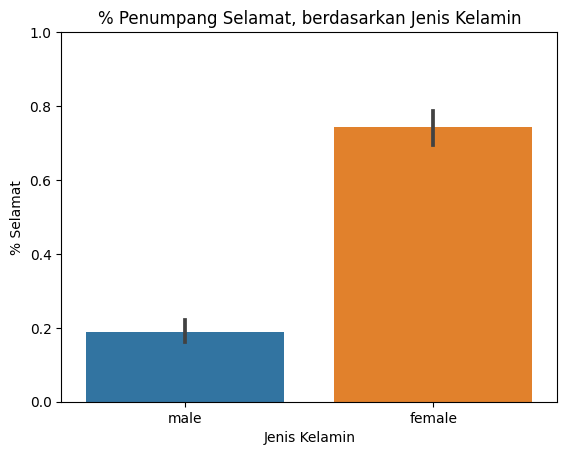

In [ ]:
sns.barplot(x=passengers['Sex'], y=passengers['Survived'])
plt.ylabel('% Selamat')
plt.xlabel('Jenis Kelamin')
plt.title('% Penumpang Selamat, berdasarkan Jenis Kelamin')
plt.ylim(0, 1)

(0.0, 1.0)

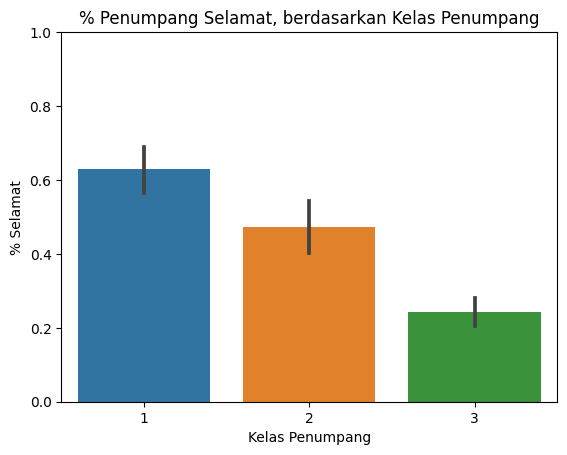

In [ ]:
sns.barplot(x=passengers['Pclass'], y=passengers['Survived'])
plt.ylabel('% Selamat')
plt.xlabel('Kelas Penumpang')
plt.title('% Penumpang Selamat, berdasarkan Kelas Penumpang')
plt.ylim(0, 1)

In [ ]:
passengers['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0, 0.5, 'Banyak penumpang')

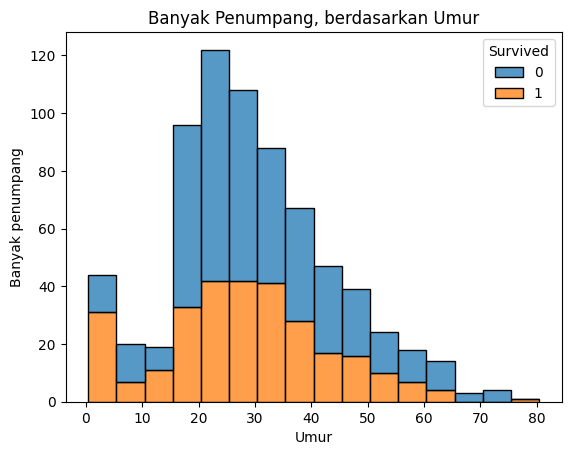

In [22]:
sns.histplot(x=passengers['Age'], hue=passengers['Survived'], multiple='stack', binwidth=5)
plt.title('Banyak Penumpang, berdasarkan Umur')
plt.xlabel('Umur')
plt.ylabel('Banyak penumpang')

Text(0, 0.5, 'Banyak Penumpang')

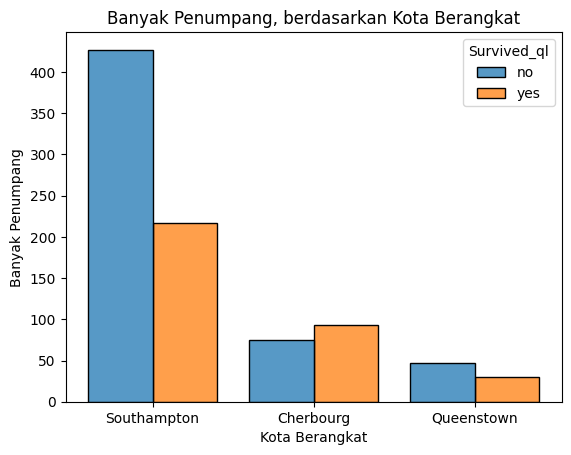

In [104]:
sns.histplot(x=passengers['Embarked'], hue=passengers['Survived_ql'], multiple='dodge', shrink=.8)
plt.title('Banyak Penumpang, berdasarkan Kota Berangkat')
plt.xlabel('Kota Berangkat')
plt.ylabel('Banyak Penumpang')

<Axes: xlabel='Fare', ylabel='Survived_ql'>

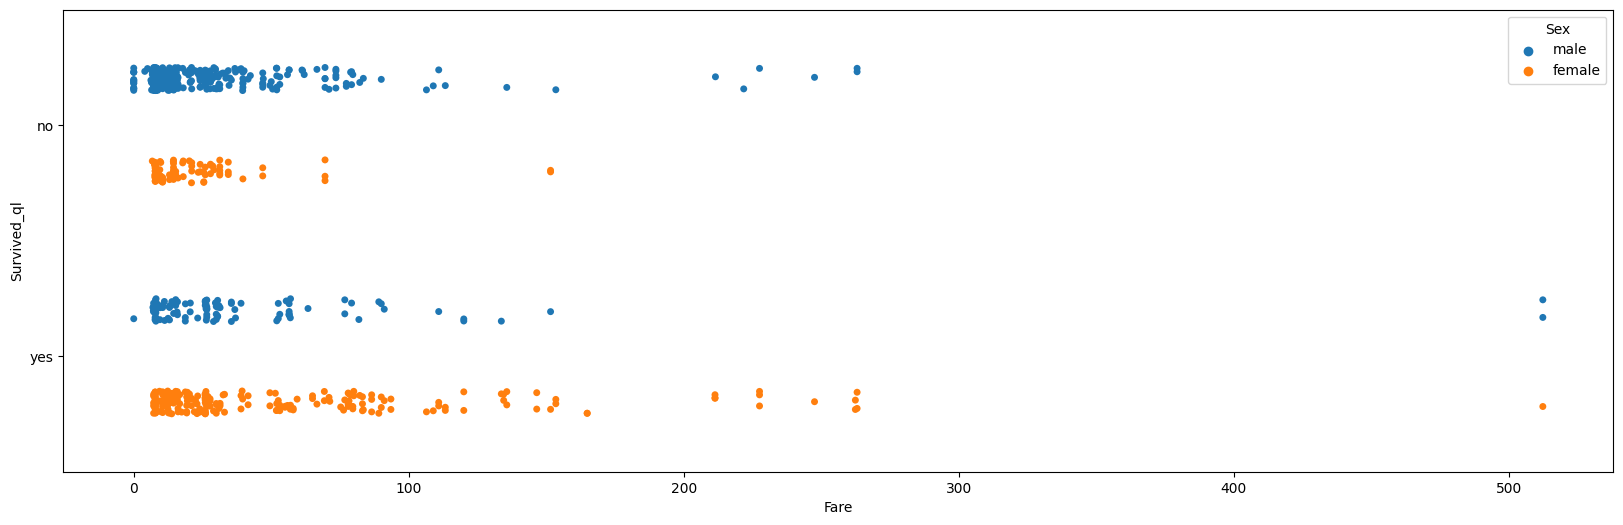

In [105]:
plt.figure(figsize=(20, 6))
sns.stripplot(x=passengers['Fare'], y=passengers['Survived_ql'], hue=passengers['Sex'], dodge='true')

<Axes: xlabel='SibSp', ylabel='Count'>

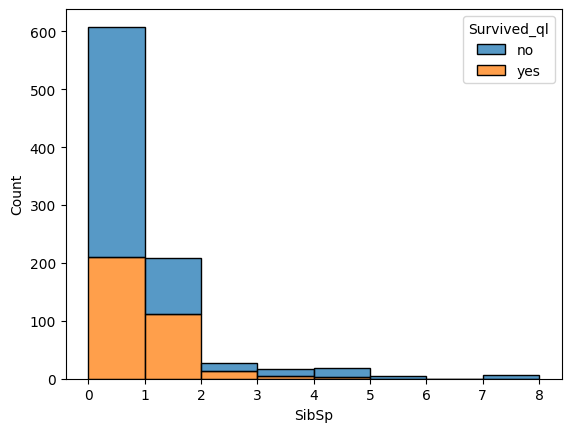

In [136]:
# plt.figure(figsize=(6, 8))
sns.histplot(x='SibSp', data=passengers, binwidth=1, hue='Survived_ql', multiple='stack')

<Axes: xlabel='Parch', ylabel='Count'>

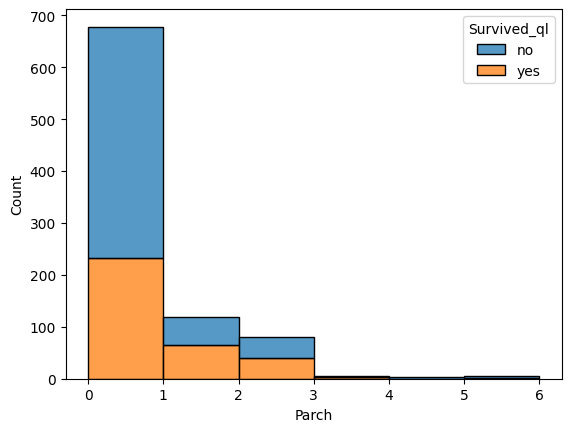

In [137]:
# plt.figure(figsize=(6, 8))
sns.histplot(x='Parch', data=passengers, binwidth=1, hue='Survived_ql', multiple='stack')

To add:
- % survived among age groups





## Random Forest

In [71]:
# karena random forest ga support missing values,
# kita hapus data yg nilai 'age' nya ga ada
passengers_modified = passengers.loc[passengers['Age'].notnull()]

# prediction features
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_n', 'Embarked_qn']
X = passengers_modified[features]

# prediction target
y = passengers_modified['Survived']

In [72]:
# data validation
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

rf_model = RandomForestClassifier(max_leaf_nodes=10, random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = np.around(rf_model.predict(val_X), 0)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
print(rf_val_mae)

0.16201117318435754


In [73]:
# train model on full data
rf_model_full = RandomForestClassifier(random_state=1)
rf_model_full.fit(X, y)

test_preds = np.around(rf_model_full.predict(X), 0)
test_preds_mae = mean_absolute_error(test_preds, y)
test_preds_mae

0.014005602240896359

In [56]:
passengers_modified['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [74]:
pd.Series(test_preds, name='Survived').value_counts()

0    428
1    286
Name: Survived, dtype: int64

## Histogram Gradient Boosting

In [32]:
# histogram gradient boosting supports missing values, so
# we reassign our target and features.
hgb_X = passengers[features]
hgb_y = passengers['Survived']

In [33]:
# data validation
hgb_train_X, hgb_val_X, hgb_train_y, hgb_val_y = train_test_split(hgb_X, hgb_y, random_state=1)

hgb_model = HistGradientBoostingClassifier(random_state=1)
hgb_model.fit(hgb_train_X, hgb_train_y)

hgb_model_predictions = hgb_model.predict(hgb_val_X)
hgb_model_mae = mean_absolute_error(hgb_model_predictions, hgb_val_y)
print(hgb_model_mae)

0.23766816143497757


In [34]:
hgb_model_full = HistGradientBoostingClassifier(random_state=1)
hgb_model_full.fit(hgb_X, hgb_y)

hgb_test_preds = hgb_model_full.predict(hgb_X)
hgb_test_preds_mae = mean_absolute_error(hgb_test_preds, hgb_y)
print(hgb_test_preds_mae)

0.04938271604938271


In [35]:
passengers['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
pd.Series(hgb_test_preds, name='Survived').value_counts()

0    563
1    328
Name: Survived, dtype: int64

## Looking for best `max_leaf_nodes` value

In [ ]:
def rf_get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
  model = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
  model.fit(train_X, train_y)
  preds_val = model.predict(val_X)
  mae = mean_absolute_error(preds_val, val_y)
  return mae

In [ ]:
# candidate_max_leaf_nodes = [i for i in range(2, 501)]
# rf_candidate_maes = [rf_get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y) for max_leaf_nodes in candidate_max_leaf_nodes]

In [ ]:
# rf_candidate_maes_copy = rf_candidate_maes.copy()
# rf_candidate_maes_copy.sort()

# rf_smallest_mae = rf_candidate_maes_copy[0]
# rf_candidate_maes.index(rf_smallest_mae)

In [ ]:
def hgb_get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
  model = HistGradientBoostingClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
  model.fit(train_X, train_y)
  preds_val = model.predict(val_X)
  mae = mean_absolute_error(preds_val, val_y)
  return mae

In [ ]:
# hgb_candidate_maes = [hgb_get_mae(max_leaf_nodes, hgb_train_X, hgb_val_X, hgb_train_y, hgb_val_y) for max_leaf_nodes in candidate_max_leaf_nodes]

In [ ]:
# hgb_candidate_maes_copy = hgb_candidate_maes.copy()
# hgb_candidate_maes_copy.sort()
# hgb_smallest_mae = hgb_candidate_maes_copy[0]

# hgb_max_leaf_nodes = hgb_candidate_maes.index(hgb_smallest_mae)
# hgb_candidate_maes.index(hgb_smallest_mae)